In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from numpy import std
from numpy import mean

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.simplefilter('ignore')

# Functions for futher uses

In [2]:
#Visualising training or test data
def plot_decision_boundary(classifier, X, y, title):
    plt.figure(figsize=(12,12))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

In [3]:
# Evaluation using cross validation
def eval_cv(classifier, metric):
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # evaluate model
    scores = cross_val_score(classifier, X, y, scoring=metric, cv=cv, n_jobs=-1)
    # report performance
    return mean(scores)

In [4]:
# Calculate the metrics
def calculate_metrics(df, method):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, annot_kws={"size": 16})
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    df.loc[method] = [accuracy, precision, recall, f1, auc]

In [5]:
def calculate_cv(df, classifier, method):
    accuracy = eval_cv(classifier, 'accuracy')
    precision = eval_cv(classifier, 'precision')
    recall = eval_cv(classifier, 'recall')
    f1 = eval_cv(classifier, 'f1')
    auc = eval_cv(classifier, 'roc_auc')
    df.loc[method] = [accuracy, precision, recall, f1, auc]    

# Data Import

In [6]:
#Importing the dataset
dataset = pd.read_csv(r'D:\Jacobs\Lecture\PTM\Sources\2021\Classification\Datasets\Action_of_offer.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Preprocessing

In [7]:
# Delete gender and user ID
del dataset['Gender']
del dataset['User ID']
dataset



,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


# Exploratory Data Analysis

<Figure size 720x720 with 0 Axes>

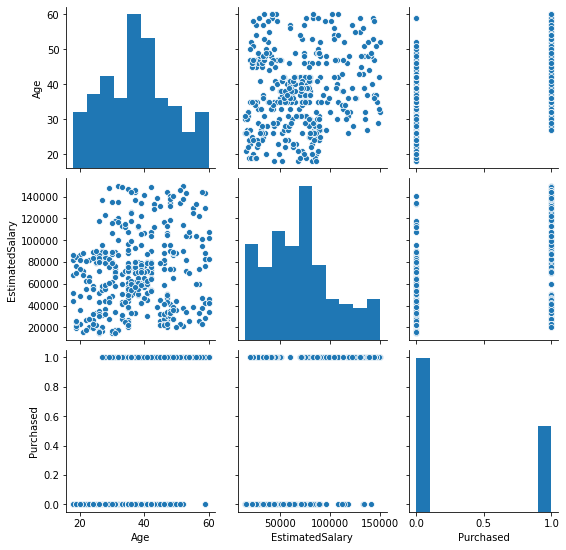

In [8]:
# Exploratory data analytics
plt.figure(figsize=(10, 10))
sns.pairplot(dataset)
plt.show()

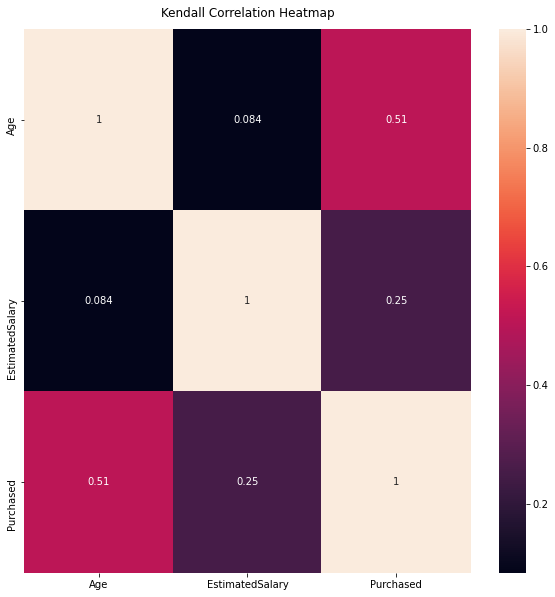

In [9]:
# Draw the correlation heatmaps using seaborn
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(dataset.corr(method='kendall'), annot=True)
heatmap.set_title('Kendall Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

# Get X and y, and then split the data

In [10]:
# Get X (independent variables) and y (dependent variable)
X = dataset.iloc[:, 0:2]
y = dataset.iloc[:, -1]
display(pd.DataFrame(X))
display(pd.DataFrame(y))

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
X_train.describe()

,Age,EstimatedSalary
count,300.000000,300.000000
mean,35.133333,69490.000000
std,10.166945,34629.572009
min,18.000000,15000.000000
25%,27.000000,43000.000000
50%,35.000000,70500.000000
75%,41.000000,88000.000000
max,60.000000,150000.000000


In [12]:
#Feature standardizing of X
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
display(pd.DataFrame(X_train))
display(pd.DataFrame(X_test))

,0,1
0,-1.589493,-1.460439
1,-0.013136,-1.431513
2,-0.899837,-0.766231
3,-0.801315,-0.361277
4,-1.589493,0.188304
...,...,...
295,0.085386,-0.187725
296,0.676520,0.101528
297,0.775042,1.229615
298,0.972087,0.275080


,0,1
0,2.252877,-0.910858
1,1.267654,0.130453
2,0.183908,1.952747
3,0.183908,0.275080
4,0.479475,-0.274501
...,...,...
95,1.070609,-0.824082
96,1.563220,-1.344737
97,1.464698,-1.431513
98,0.085386,-1.055484


# Create Dataframes for Evaluation

In [13]:
# included methods/models and metrics
methods = ['Logistic Regression', 'KNN', 'Linear SVM', 'Kernel SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost', 'ANN']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score', 'ROC AUC']

# create model quality dataframe
quality_df = pd.DataFrame(columns = metrics, index = methods)
display(quality_df)

# create model quality cross validation dataframe
quality_cv_df = pd.DataFrame(columns = metrics, index = methods)
display(quality_cv_df)

,Accuracy,Precision,Recall,F1 score,ROC AUC
Logistic Regression,NaN,NaN,NaN,NaN,NaN
KNN,NaN,NaN,NaN,NaN,NaN
Linear SVM,NaN,NaN,NaN,NaN,NaN
Kernel SVM,NaN,NaN,NaN,NaN,NaN
Naive Bayes,NaN,NaN,NaN,NaN,NaN
Decision Tree,NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN
XGBoost,NaN,NaN,NaN,NaN,NaN
ANN,NaN,NaN,NaN,NaN,NaN


,Accuracy,Precision,Recall,F1 score,ROC AUC
Logistic Regression,NaN,NaN,NaN,NaN,NaN
KNN,NaN,NaN,NaN,NaN,NaN
Linear SVM,NaN,NaN,NaN,NaN,NaN
Kernel SVM,NaN,NaN,NaN,NaN,NaN
Naive Bayes,NaN,NaN,NaN,NaN,NaN
Decision Tree,NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN
XGBoost,NaN,NaN,NaN,NaN,NaN
ANN,NaN,NaN,NaN,NaN,NaN


# Logistic Regression

In [14]:
# Fit the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [15]:
#Predicting test set result
y_pred = classifier.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,1
1,1
2,1
3,0
4,0
...,...
95,0
96,0
97,0
98,0


,Accuracy,Precision,Recall,F1 score,ROC AUC
Logistic Regression,0.75,0.95122,0.629032,0.757282,0.7882
KNN,NaN,NaN,NaN,NaN,NaN
Linear SVM,NaN,NaN,NaN,NaN,NaN
Kernel SVM,NaN,NaN,NaN,NaN,NaN
Naive Bayes,NaN,NaN,NaN,NaN,NaN
Decision Tree,NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN
XGBoost,NaN,NaN,NaN,NaN,NaN
ANN,NaN,NaN,NaN,NaN,NaN


,Accuracy,Precision,Recall,F1 score,ROC AUC
Logistic Regression,0.867333,0.862676,0.872821,0.866369,0.943979
KNN,NaN,NaN,NaN,NaN,NaN
Linear SVM,NaN,NaN,NaN,NaN,NaN
Kernel SVM,NaN,NaN,NaN,NaN,NaN
Naive Bayes,NaN,NaN,NaN,NaN,NaN
Decision Tree,NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN
XGBoost,NaN,NaN,NaN,NaN,NaN
ANN,NaN,NaN,NaN,NaN,NaN


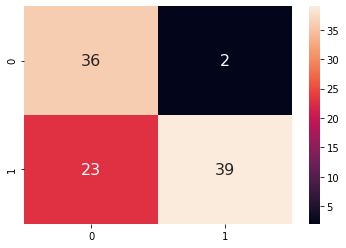

In [16]:
method = 'Logistic Regression'
calculate_metrics(quality_df, method)
display(quality_df)
calculate_cv(quality_cv_df, classifier, method)
display(quality_cv_df)

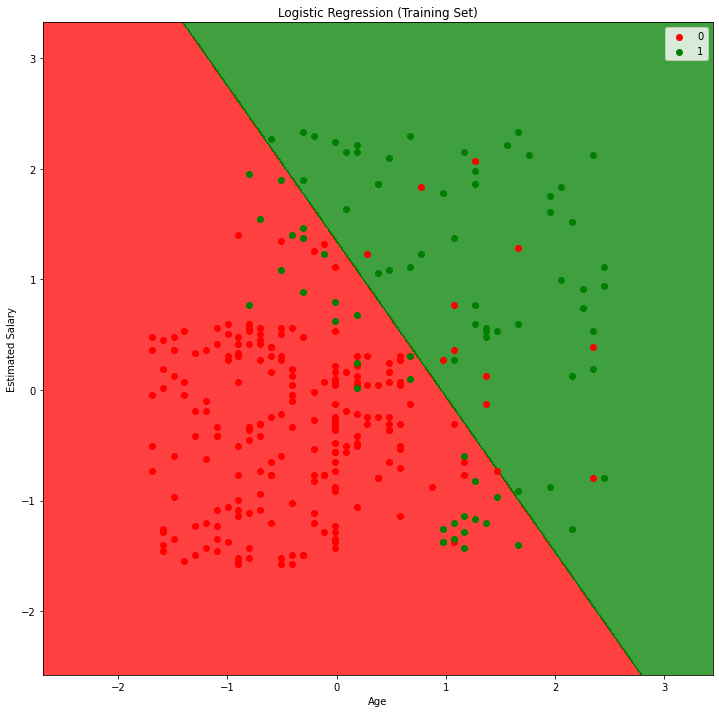

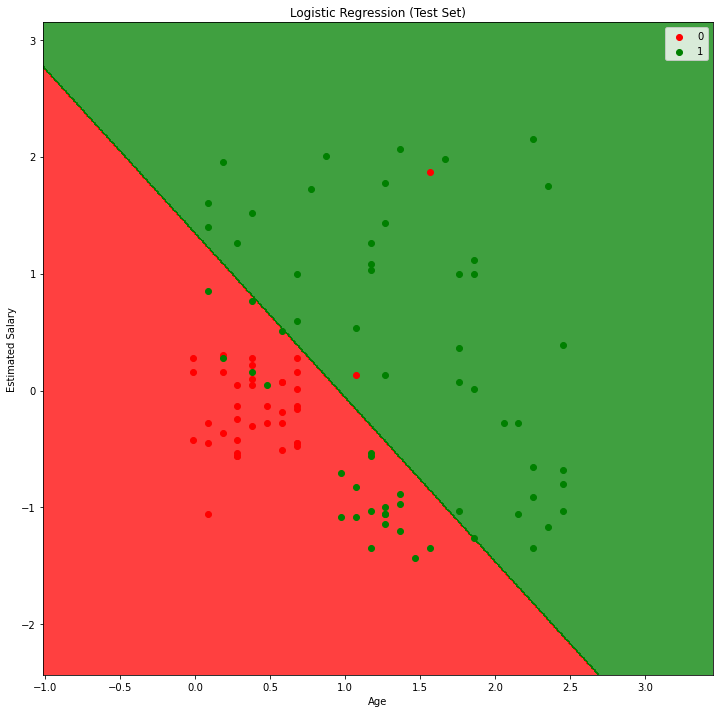

In [17]:
plot_decision_boundary(classifier, X_train, y_train, 'Logistic Regression (Training Set)')
plot_decision_boundary(classifier, X_test, y_test, 'Logistic Regression (Test Set)')

# KNN

In [18]:
# Fit the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [19]:
#Predicting test set result
y_pred = classifier.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,1
1,1
2,1
3,0
4,0
...,...
95,1
96,1
97,1
98,0


,Accuracy,Precision,Recall,F1 score,ROC AUC
Logistic Regression,0.75,0.95122,0.629032,0.757282,0.7882
KNN,0.89,0.981132,0.83871,0.904348,0.906197
Linear SVM,NaN,NaN,NaN,NaN,NaN
Kernel SVM,NaN,NaN,NaN,NaN,NaN
Naive Bayes,NaN,NaN,NaN,NaN,NaN
Decision Tree,NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN
XGBoost,NaN,NaN,NaN,NaN,NaN
ANN,NaN,NaN,NaN,NaN,NaN


,Accuracy,Precision,Recall,F1 score,ROC AUC
Logistic Regression,0.867333,0.862676,0.872821,0.866369,0.943979
KNN,0.931333,0.938907,0.921815,0.929793,0.983735
Linear SVM,NaN,NaN,NaN,NaN,NaN
Kernel SVM,NaN,NaN,NaN,NaN,NaN
Naive Bayes,NaN,NaN,NaN,NaN,NaN
Decision Tree,NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN
XGBoost,NaN,NaN,NaN,NaN,NaN
ANN,NaN,NaN,NaN,NaN,NaN


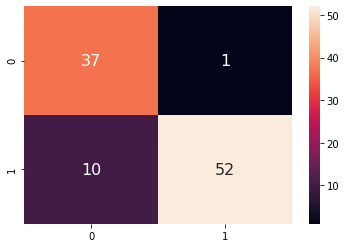

In [20]:
# Evaluate the model
method = 'KNN'
calculate_metrics(quality_df, method)
display(quality_df)
calculate_cv(quality_cv_df, classifier, method)
display(quality_cv_df)

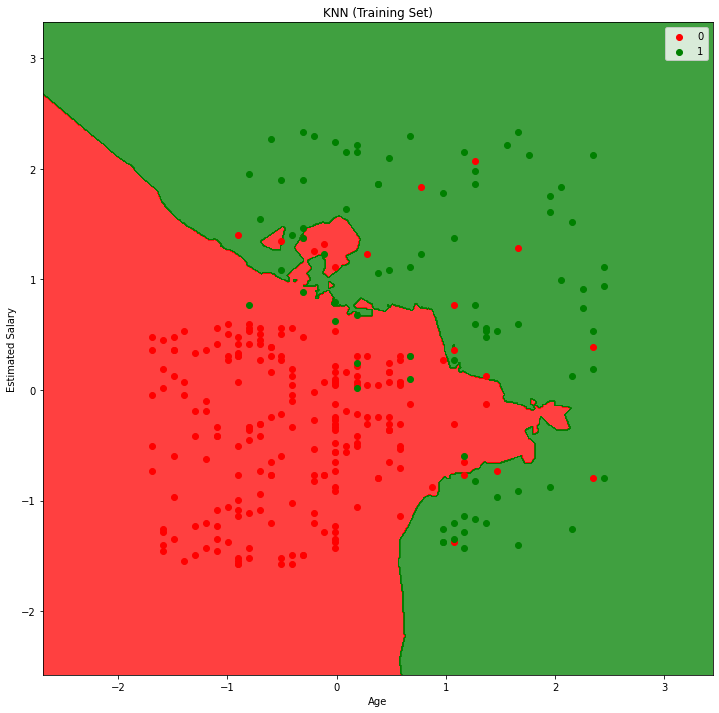

In [ ]:
plot_decision_boundary(classifier, X_train, y_train, 'KNN (Training Set)')
plot_decision_boundary(classifier, X_test, y_test, 'KNN(Test Set)')

# Linear SVM

In [ ]:
# Fit the model
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', degree = 4, random_state = 0)
classifier.fit(X_train, y_train)


In [ ]:
#Predicting test set 
y_pred = classifier.predict(X_test)
display(pd.DataFrame(y_pred))

In [ ]:
# Evaluate the model
method = 'Linear SVM'
calculate_metrics(quality_df, method)
display(quality_df)
calculate_cv(quality_cv_df, classifier, method)
display(quality_cv_df)

In [ ]:
plot_decision_boundary(classifier, X_train, y_train, 'Linear SVM (Training Set)')
plot_decision_boundary(classifier, X_test, y_test, 'Linear SVM (Test Set)')

# Kernel SVM

In [ ]:
# Fit the model
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',  random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
#Predict the test set 
y_pred = classifier.predict(X_test)
display(pd.DataFrame(y_pred))

In [ ]:
# Evaluate the model
method = 'Kernel SVM'
calculate_metrics(quality_df, method)
display(quality_df)
calculate_cv(quality_cv_df, classifier, method)
display(quality_cv_df)

In [ ]:
plot_decision_boundary(classifier, X_train, y_train, 'Kernel SVM (Training Set)')
plot_decision_boundary(classifier, X_test, y_test, 'Kernel SVM (Test Set)')

# Naive Bayes

In [ ]:
# Fit the model
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

In [ ]:
#Predict the test set 
y_pred = classifier.predict(X_test)
display(pd.DataFrame(y_pred))

In [ ]:
# Evaluate the model
method = 'Naive Bayes'
calculate_metrics(quality_df, method)
display(quality_df)
calculate_cv(quality_cv_df, classifier, method)
display(quality_cv_df)

In [ ]:
plot_decision_boundary(classifier, X_train, y_train, 'Naive Bayes (Training Set)')
plot_decision_boundary(classifier, X_test, y_test, 'Naive Bayes (Test Set)')

# Decision Tree

In [ ]:
# Fit the model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, min_samples_leaf = 10)
classifier.fit(X_train, y_train)

In [ ]:
#Predict the test set 
y_pred = classifier.predict(X_test)
display(pd.DataFrame(y_pred))

In [ ]:
# Evaluate the model
method = 'Decision Tree'
calculate_metrics(quality_df, method)
display(quality_df)
calculate_cv(quality_cv_df, classifier, method)
display(quality_cv_df)

In [ ]:
plot_decision_boundary(classifier, X_train, y_train, 'Decision Tree(Training Set)')
plot_decision_boundary(classifier, X_test, y_test, 'Decision Tree (Test Set)')

# Random Forest

In [ ]:
# Fit the model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, oob_score=True, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
#Predict the test set 
y_pred = classifier.predict(X_test)
display(pd.DataFrame(y_pred))

In [ ]:
# Evaluate the model
method = 'Random Forest'
calculate_metrics(quality_df, method)
display(quality_df)
calculate_cv(quality_cv_df, classifier, method)
display(quality_cv_df)

In [ ]:
plot_decision_boundary(classifier, X_train, y_train, 'Random Forest(Training Set)')
plot_decision_boundary(classifier, X_test, y_test, 'Random Forest (Test Set)')

# XGBoost

In [ ]:
# Fit the model
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

In [ ]:
#Predict the test set 
y_pred = classifier.predict(X_test)
display(pd.DataFrame(y_pred))

In [ ]:
# Evaluate the model
method = 'XGBoost'
calculate_metrics(quality_df, method)
display(quality_df)
calculate_cv(quality_cv_df, classifier, method)
display(quality_cv_df)

In [ ]:
plot_decision_boundary(classifier, X_train, y_train, 'XGBoost (Training Set)')
plot_decision_boundary(classifier, X_test, y_test, 'XGBoost (Test Set)')

# ANN

In [ ]:
#Make an ANN
from keras.models import Sequential
from keras.layers import Dense

#Initialie ANN
classifier = Sequential()

#Adding input layer and hidden layer, init = initialization of weight
classifier.add(Dense(2, activation = 'relu', input_dim = 2))

#Adding output layer
classifier.add(Dense(1, activation = 'sigmoid'))

#compile ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fitting ANN to training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 20)



In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
display(pd.DataFrame(y_pred))

In [ ]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, annot_kws={"size": 16})
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
quality_df.loc['ANN'] = [accuracy, precision, recall, f1, auc]
quality_df

In [ ]:
plot_decision_boundary(classifier, X_train, y_train, 'ANN(Training Set)')
plot_decision_boundary(classifier, X_test, y_test, 'ANN (Test Set)')

In [ ]:
quality_df.sort_values(by=['Accuracy'], inplace=True, ascending=False)
quality_df

In [ ]:
quality_cv_df.sort_values(by=['Accuracy'], inplace=True, ascending=False)
quality_cv_df